In [1]:
import torch
import torch.nn as nn
import torch.cuda as cuda
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Subset, DataLoader
from torch.utils.data import Dataset, random_split
import os
import torch
from torchvision.datasets import ImageFolder
from torchvision import transforms, datasets
from torch.utils.data import Subset, DataLoader
import random

In [3]:
databasename = 'CelebA'

In [ ]:
if databasename == 'CIFAR':
    num_classes = 10
    inchannels = 3
    imgsize = 32
    # Normal case to load the entire dataset

    # Data transformations
    transform_train = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    transform_test = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    # Load CIFAR-100
    trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform_train)

    # Define proportions for splitting
    train_size = 15000
    val_size = 35000

    # Get the total number of samples
    total_size = len(trainset)

    # Generate random indices for train and val
    indices = torch.randperm(total_size).tolist()
    train_indices = indices[:train_size]
    val_indices = indices[train_size:train_size+val_size]

    # Create custom subsets
    train_subset = Subset(trainset, train_indices)
    val_subset = Subset(trainset, val_indices)

    # Create DataLoaders for the subsets
    trainloader = torch.utils.data.DataLoader(train_subset, batch_size=64, shuffle=True, num_workers=2)
    externalloader = torch.utils.data.DataLoader(val_subset, batch_size=64, shuffle=True, num_workers=2)

    valset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform_test)
    valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=False, num_workers=2)

    # Custom labels
    print(len(trainset)) 
    print(len(valset))
elif databasename== 'MNIST':
    num_classes = 10
    inchannels = 1
    imgsize = 28
    # Normal case to load the entire dataset

    # Data transformations for MNIST (grayscale)
    transform_train = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))  # Normalization for grayscale
    ])

    transform_test = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    # Load MNIST
    trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform_train)

    # Define proportions for splitting
    train_size = 25000
    val_size = 35000

    # Get the total number of samples
    total_size = len(trainset)

    # Generate random indices for train and val
    indices = torch.randperm(total_size).tolist()
    train_indices = indices[:train_size]
    val_indices = indices[train_size:train_size+val_size]

    # Create custom subsets
    train_subset = Subset(trainset, train_indices)
    val_subset = Subset(trainset, val_indices)

    # Create DataLoaders for the subsets
    trainloader = torch.utils.data.DataLoader(train_subset, batch_size=64, shuffle=True, num_workers=2)
    externalloader = torch.utils.data.DataLoader(val_subset, batch_size=64, shuffle=True, num_workers=2)

    valset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform_test)
    valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=False, num_workers=2)

    # Custom labels
    print(len(trainset)) 
    print(len(valset))

elif databasename== 'GST':
    num_classes = 43
    inchannels = 3
    imgsize = 64
    # Data transformations
    transform_train = transforms.Compose([
        transforms.Resize((imgsize, imgsize)),  # Resize to 128x128
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    transform_test = transforms.Compose([
        transforms.Resize((imgsize, imgsize)),  # Resize to 128x128
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    # Load GTSRB
    trainset = torchvision.datasets.GTSRB(root='./data', split='train', download=True, transform=transform_train)

    # Define proportions for splitting
    train_size = 11000
    val_size = 15640

    # Get the total number of samples
    total_size = len(trainset)

    # Generate random indices for train and val
    indices = torch.randperm(total_size).tolist()
    train_indices = indices[:train_size]
    val_indices = indices[train_size:train_size+val_size]

    # Create custom subsets
    train_subset = Subset(trainset, train_indices)
    val_subset = Subset(trainset, val_indices)

    # Create DataLoaders for the subsets
    trainloader = torch.utils.data.DataLoader(train_subset, batch_size=64, shuffle=True, num_workers=2)
    externalloader = torch.utils.data.DataLoader(val_subset, batch_size=64, shuffle=True, num_workers=2)

    valset = torchvision.datasets.GTSRB(root='./data', split='test', download=True, transform=transform_test)
    valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=False, num_workers=2)

    # Custom labels
    print(len(trainset)) 
    print(len(valset))

elif databasename== 'TinyImagenet':
    num_classes = 200
    inchannels = 3
    imgsize = 64
    # Data transformations (including resize)
    transform_train = transforms.Compose([
        transforms.Resize((64, 64)),  # Resize to 64x64
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    transform_test = transforms.Compose([
        transforms.Resize((64, 64)),  # Resize to 64x64
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    # Load datasets from folders
    train_dir = os.path.join('tiny-imagenet-200', 'train')
    test_dir = os.path.join('tiny-imagenet-200', 'test')

    # Print paths to verify
    print("Train path:", train_dir)
    print("Test path:", test_dir)
    # Use ImageFolder to load images from the folders with transformations
    train_dataset = ImageFolder(root=train_dir, transform=transform_train)
    test_dataset = ImageFolder(root=test_dir, transform=transform_test)

    # Define proportions for splitting (val larger than train)
    train_size = 40000  # Example: 11k for train
    val_size = len(train_dataset) - train_size  # Remaining for val

    # Generate random indices for train and val
    indices = torch.randperm(len(train_dataset)).tolist()
    train_indices = indices[:train_size]
    val_indices = indices[train_size:train_size + val_size]

    # Create custom subsets
    train_subset = Subset(train_dataset, train_indices)
    val_subset = Subset(train_dataset, val_indices)

    # Create DataLoaders for the subsets
    trainloader = DataLoader(train_subset, batch_size=64, shuffle=True, num_workers=1)
    externalloader = DataLoader(val_subset, batch_size=64, shuffle=True, num_workers=1)

    # Load the test dataset
    valloader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=1)

    # Print dataset sizes
    print(f'Train dataset size: {len(train_subset)}')
    print(f'Val dataset size: {len(val_subset)}')
    print(f'Test dataset size: {len(test_dataset)}')
elif databasename== 'CelebA':
    num_classes = 10575
    inchannels = 3
    imgsize = 64

    # Data transformations
    transform_train = transforms.Compose([
        transforms.Resize((64, 64)),  # Resize if necessary
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    transform_test = transforms.Compose([
        transforms.Resize((64, 64)),  # Resize if necessary
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    # Path to the dataset with subfolders for each identity
    data_dir = './data/CASIA-WebFace'  # Change this path to the correct one

    # Load the complete dataset from the folders with subfolders for each identity
    dataset = datasets.ImageFolder(root=data_dir, transform=transform_train)

    # Set sizes for each subset
    train_size = 200000
    val_size = 250000
    total_size = len(dataset)
    test_size = total_size - train_size - val_size

    # Generate random indices for each set
    indices = torch.randperm(total_size).tolist()
    test_indices = indices[:test_size]  # Keep this set fixed
    val_indices = indices[test_size:test_size + val_size]
    train_indices = indices[test_size + val_size:]

    # Create custom subsets
    train_subset = Subset(dataset, train_indices)
    val_subset = Subset(dataset, val_indices)
    test_subset = Subset(dataset, test_indices)

    # DataLoaders for the sets
    trainloader = DataLoader(train_subset, batch_size=64, shuffle=True, num_workers=2)
    externalloader = DataLoader(val_subset, batch_size=64, shuffle=True, num_workers=2)
    valloader = DataLoader(test_subset, batch_size=64, shuffle=False, num_workers=2)

    # Verify sizes
    print(f'Train set size: {len(train_subset)}')
    print(f'Val set size: {len(val_subset)}')
    print(f'Test set size: {len(test_subset)}')


Tamaño del conjunto de entrenamiento: 200000
Tamaño del conjunto de validación: 250000
Tamaño del conjunto de test: 44406


In [5]:
class PatchEmbedding(nn.Module):
    def __init__(self, img_size, patch_size, in_channels, embed_dim):
        super().__init__()
        self.patch_size = patch_size
        self.n_patches = (img_size // patch_size) ** 2
        self.proj = nn.Conv2d(in_channels, embed_dim, kernel_size=patch_size, stride=patch_size)

    def forward(self, x):
        x = self.proj(x)  # (batch_size, embed_dim, n_patches ** 0.5, n_patches ** 0.5)
        x = x.flatten(2).transpose(1, 2)  # (batch_size, n_patches, embed_dim)
        return x

class Attention(nn.Module):
    def __init__(self, dim, n_heads, qkv_bias=True, attn_drop=0., proj_drop=0.):
        super().__init__()
        self.n_heads = n_heads
        self.scale = (dim // n_heads) ** -0.5

        self.qkv = nn.Linear(dim, dim * 3, bias=qkv_bias)
        self.attn_drop = nn.Dropout(attn_drop)
        self.proj = nn.Linear(dim, dim)
        self.proj_drop = nn.Dropout(proj_drop)

    def forward(self, x):
        B, N, C = x.shape
        qkv = self.qkv(x).reshape(B, N, 3, self.n_heads, C // self.n_heads).permute(2, 0, 3, 1, 4)
        q, k, v = qkv[0], qkv[1], qkv[2]

        attn = (q @ k.transpose(-2, -1)) * self.scale
        attn = attn.softmax(dim=-1)
        attn = self.attn_drop(attn)

        x = (attn @ v).transpose(1, 2).reshape(B, N, C)
        x = self.proj(x)
        x = self.proj_drop(x)
        return x

class MLP(nn.Module):
    def __init__(self, in_features, hidden_features=None, out_features=None, drop=0.):
        super().__init__()
        out_features = out_features or in_features
        hidden_features = hidden_features or in_features
        self.fc1 = nn.Linear(in_features, hidden_features)
        self.act = nn.GELU()
        self.fc2 = nn.Linear(hidden_features, out_features)
        self.drop = nn.Dropout(drop)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act(x)
        x = self.drop(x)
        x = self.fc2(x)
        x = self.drop(x)
        return x

class Block(nn.Module):
    def __init__(self, dim, n_heads, mlp_ratio=4., qkv_bias=True, drop=0., attn_drop=0., drop_path=0.):
        super().__init__()
        self.norm1 = nn.LayerNorm(dim)
        self.attn = Attention(dim, n_heads=n_heads, qkv_bias=qkv_bias, attn_drop=attn_drop, proj_drop=drop)
        self.drop_path = nn.Identity()  # Se puede cambiar por Stochastic Depth si quieres
        self.norm2 = nn.LayerNorm(dim)
        self.mlp = MLP(in_features=dim, hidden_features=int(dim * mlp_ratio), drop=drop)

    def forward(self, x):
        x = x + self.drop_path(self.attn(self.norm1(x)))
        x = x + self.drop_path(self.mlp(self.norm2(x)))
        return x

class VisionTransformer(nn.Module):
    def __init__(self, img_size=32, patch_size=4, in_channels=3, num_classes=100, embed_dim=64, depth=12, n_heads=8, mlp_ratio=4., qkv_bias=True, drop_rate=0., attn_drop_rate=0.):
        super().__init__()
        self.patch_embed = PatchEmbedding(img_size, patch_size, in_channels, embed_dim)
        self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim))
        self.pos_embed = nn.Parameter(torch.zeros(1, 1 + self.patch_embed.n_patches, embed_dim))
        self.pos_drop = nn.Dropout(p=drop_rate)

        self.blocks = nn.Sequential(*[
            Block(
                dim=embed_dim, n_heads=n_heads, mlp_ratio=mlp_ratio, 
                qkv_bias=qkv_bias, drop=drop_rate, attn_drop=attn_drop_rate
            ) for _ in range(depth)
        ])

        self.norm = nn.LayerNorm(embed_dim)
        self.head = nn.Linear(embed_dim, num_classes)

        # CNN       
        
        self.fc3 = nn.Linear(embed_dim * (1 + self.patch_embed.n_patches), 1)  # Ajustar dimensiones
        self.reluCNN = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

        self.binary_block_index = 7

    def forward(self, x):
        B = x.shape[0]
        x = self.patch_embed(x)

        cls_tokens = self.cls_token.expand(B, -1, -1)
        x = torch.cat((cls_tokens, x), dim=1)
        x = x + self.pos_embed
        xprev = self.pos_drop(x)

        # Iterar a través de los bloques, guardando la salida del bloque seleccionado para la tarea binaria
        x1 = xprev
        for i, block in enumerate(self.blocks):
            x1 = block(x1)
            if i == self.binary_block_index:
                # Guardar la salida del bloque seleccionado para la clasificación binaria
                x_for_binary = x1.clone()

        # Capa final de clasificación del ViT (usando solo el token de clase)
        x = self.norm(x1)
        cls_output = self.head(x[:, 0])

        # Clasificación binaria usando la salida del bloque intermedio
        x_flat = x_for_binary.view(B, -1)  # Aplana la secuencia para pasarlo a la capa lineal
        xc = self.sigmoid(self.fc3(x_flat))

        return cls_output, xc


In [ ]:

model = VisionTransformer(img_size=imgsize, patch_size=4, in_channels=inchannels, num_classes=num_classes, embed_dim=64, depth=12, n_heads=8)
print(model)
device = 'cuda' if cuda.is_available() else 'cpu'
print(device)
model.to(device)

# Loss and optimizer
criterion1 = nn.CrossEntropyLoss()
criterion2 = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)


VisionTransformer(
  (patch_embed): PatchEmbedding(
    (proj): Conv2d(3, 64, kernel_size=(4, 4), stride=(4, 4))
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=64, out_features=192, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=64, out_features=64, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (drop_path): Identity()
      (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
      (mlp): MLP(
        (fc1): Linear(in_features=64, out_features=256, bias=True)
        (act): GELU(approximate='none')
        (fc2): Linear(in_features=256, out_features=64, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
    )
    (1): Block(
      (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
      (attn): Attention(
   

In [7]:
def evaluate_model():
    model.eval()
    with torch.no_grad():
        val_loss = 0.0
        val_accuracy = 0.0
        for data in externalloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs1, _ = model(inputs)
            loss = criterion1(outputs1, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs1.data, 1)
            total = labels.size(0)
            correct = (predicted == labels).sum().item()
            val_accuracy += (100 * correct / total)

        val_loss /= len(externalloader)
        val_accuracy /= len(externalloader)
        return val_loss, val_accuracy

In [ ]:
from sklearn.metrics import accuracy_score

def evaluate_model2(model, trainloader, externalloader, device):
    model.eval()  # Evaluation mode

    # Determine which dataloader is smaller
    min_batches = min(len(trainloader), len(externalloader))
    
    # Get all predictions and labels from the training dataset (class 1)
    train_outputs = []
    train_labels = []
    val_loss = 0.0
    with torch.no_grad():
        for i, data in enumerate(trainloader):
            if i >= min_batches:
                break
            inputs, _ = data
            labels = torch.ones(len(inputs)).unsqueeze(1)
            inputs, labels = inputs.to(device), labels.to(device)
            _, outputs = model(inputs)
            loss = criterion2(outputs, labels)
            val_loss += loss.item()
            train_outputs.append(outputs)
            train_labels.append(labels)
    
    train_outputs = torch.cat(train_outputs)
    train_labels = torch.cat(train_labels)
    
    # Get all predictions and labels from the external dataset (class 0)
    external_outputs = []
    external_labels = []
    with torch.no_grad():
        for i, data in enumerate(externalloader):
            if i >= min_batches:
                break
            inputs, _ = data
            labels = torch.zeros(len(inputs)).unsqueeze(1)
            inputs, labels = inputs.to(device), labels.to(device)
            _, outputs = model(inputs)
            loss = criterion2(outputs, labels)
            val_loss += loss.item()
            external_outputs.append(outputs)
            external_labels.append(labels)  # Class 1 for the external dataset
    
    external_outputs = torch.cat(external_outputs)
    external_labels = torch.cat(external_labels)

    # Balance the amounts by selecting the minimum number of samples from both classes
    min_len = min(len(train_outputs), len(external_outputs))
    
    # Randomly select min_len samples from each class
    indices_train = torch.randperm(len(train_outputs))[:min_len]
    indices_external = torch.randperm(len(external_outputs))[:min_len]

    correct_class1 = (train_outputs > 0.5).sum().item()
    correct_class0 = (external_outputs < 0.5).sum().item()
    
    balanced_outputs = torch.cat((train_outputs[indices_train], external_outputs[indices_external]))
    balanced_labels = torch.cat((train_labels[indices_train], external_labels[indices_external]))
    
    # Convert to binary labels (0 or 1)
    balanced_outputs = (balanced_outputs > 0.5).float()

    # print('Average of class 0 outputs (NOT used in training)', external_outputs.mean().item(), 'and average of class 1 outputs', train_outputs.mean().item())
    val_losstotal = val_loss
    # Calculate the metrics
    accuracy = accuracy_score(balanced_labels.cpu(), balanced_outputs.cpu())
    # print('Accuracy of class 0 (NOT used in training): ', correct_class0 / len(train_outputs))
    # print('Accuracy of class 1 (Used in training): ', correct_class1 / len(external_outputs))
    # print(f'Accuracy: {accuracy:.4f}')

    return accuracy, val_losstotal


In [10]:
cifar_iter = iter(trainloader)
external_iter = iter(externalloader)
div = round(len(cifar_iter)/len(external_iter))

In [ ]:
from IPython.display import clear_output

def normalize_losses(losses):
    return [loss / losses[0] for loss in losses]

def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies, 
                 train_losses2, val_losses2, train_accuracies2, val_accuracies2):
    epochs = range(1, len(train_losses) + 1)
    clear_output(wait=True)
    plt.figure(figsize=(14, 5))
    
    # Loss norm
    train_losses = normalize_losses(train_losses)
    val_losses = normalize_losses(val_losses)
    train_losses2 = normalize_losses(train_losses2)
    val_losses2 = normalize_losses(val_losses2)

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'bo-', label='Train Loss Task 1')
    plt.plot(epochs, val_losses, 'ro-', label='Val Loss Task 1')
    plt.plot(epochs, train_losses2, 'bo--', label='Train Loss Task 2')
    plt.plot(epochs, val_losses2, 'ro--', label='Val Loss Task 2')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Precision plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, 'bo-', label='Train Accuracy Task 1')
    plt.plot(epochs, val_accuracies, 'ro-', label='Val Accuracy Task 1')
    plt.plot(epochs, train_accuracies2, 'bo--', label='Train Accuracy Task 2')
    plt.plot(epochs, val_accuracies2, 'ro--', label='Val Accuracy Task 2')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.show()


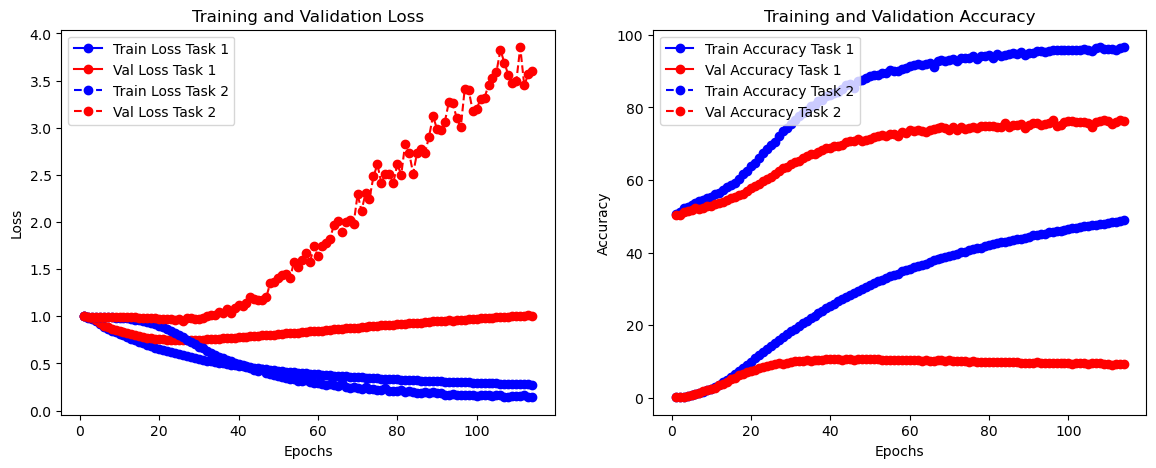

KeyboardInterrupt: 

In [ ]:
# Lists to store losses and accuracies
train_losses = []
train_accuracies = []
train_losses_batch = []
train_accuracies_batch = []
val_losses = []
val_accuracies = []
val_losses2 = []
val_losses3 = []
val_accuracies2 = []
val_accuracies3 = []

train_losses2 = []
train_accuracies2 = []
train_losses2_batch = []
train_accuracies2_batch = []

initial_loss1 = None
initial_loss2 = None
epochs = 300
# Training loop
for epoch in range(epochs):  # number of epochs
    external_iter = iter(trainloader)
    running_loss = 0.0
    train_losses_batch = []
    train_accuracies_batch = [] 
    train_losses2_batch = []
    train_accuracies2_batch = []
    # print('Currently at epoch: ', epoch)
    for i, data in enumerate(externalloader, 0):
        # Training data
        try:
            inputs, labels = next(external_iter)
        except StopIteration:
            external_iter = iter(trainloader)
            inputs, labels = next(external_iter)
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs1, outputs2 = model(inputs)
        loss1 = criterion1(outputs1, labels)

        # External data
        external_inputs, _ = data
        external_labels = torch.zeros(len(external_inputs)).unsqueeze(1)
        external_labels = external_labels.to(device)
        external_inputs = external_inputs.to(device)
        _, external_outputs2 = model(external_inputs)
        
        external_loss = criterion2(external_outputs2, external_labels)
    
        labels2 = torch.ones(len(inputs)).unsqueeze(1)
        labels2 = labels2.to(device)
        loss2 = criterion2(outputs2, labels2)
        # total_loss = loss1 + external_loss + loss2
        # total_loss = loss1 + (external_loss + loss2)*0
        # Store initial losses
        if initial_loss1 is None:
            initial_loss1 = loss1.item()
        if initial_loss2 is None:
            initial_loss2 = (external_loss + loss2).item()
            
        # Normalize losses
        normalized_loss1 = loss1 / initial_loss1
        normalized_loss2 = (external_loss + loss2) / initial_loss2

        # Weighted total loss (both normalized)
        total_loss = normalized_loss1 + normalized_loss2
        # total_loss = external_loss + loss2
        total_loss.backward()
        optimizer.step()

        # Task 1 accuracy calculation
        _, predicted = torch.max(outputs1.data, 1)
        total = labels.size(0)
        correct = (predicted == labels).sum().item()
        accuracy = (100 * correct / total)

        # Store losses and accuracy
        train_losses_batch.append(loss1.item())
        train_accuracies_batch.append(accuracy)

        # Task 2 accuracy calculation
        outputstask2 = torch.cat((external_outputs2, outputs2), dim=0)
        labelstask2 = torch.cat((external_labels, labels2), dim=0)
        predicted = torch.round(outputstask2)
        total = labelstask2.size(0)
        correct = (predicted == labelstask2).sum().item()
        accuracytask2 = (100 * correct / total)
        losstask2 = external_loss + loss2  
        
        # Store task 2 losses and accuracy
        train_losses2_batch.append(losstask2.item())
        train_accuracies2_batch.append(accuracytask2)

        # Store overall task 2 losses and accuracy
        train_losses2.append(losstask2.item())
        train_accuracies2.append(accuracytask2)
        # if i>20:
        #     break
        
        # if (i + 1) % 100 == 0:
        #     # Validation evaluation
        #     val_loss, val_accuracy = evaluate_model()
        #     val_losses.append(val_loss)
        #     val_accuracies.append(val_accuracy)
        #     print('[%d, %5d] train loss: %.3f train acc: %.2f val loss: %.3f val acc: %.2f' %
        #         (epoch + 1, i + 1, loss1.item(), accuracy, val_loss, val_accuracy))
            
        # if (i + 1) % 50 == 0:
        #     print('BATCH ACCURACY: ', i, ', for task 1: ', accuracy,' and its loss: ', loss1.item())
        #     print('BATCH ACCURACY: ', i, ', for task 2: ', accuracytask2,' and its loss: ', losstask2.item())
    
    # Store epoch losses and accuracy
    train_losses.append(np.mean(train_losses_batch))
    train_accuracies.append(np.mean(train_accuracies_batch))
    val_loss, val_accuracy = evaluate_model()
    val_accuracy2, val_loss2 = evaluate_model2(model, trainloader, valloader, device)
    val_accuracy3, val_loss3 = evaluate_model2(model, trainloader, externalloader, device)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    val_accuracies2.append(100*val_accuracy2)
    val_accuracies3.append(100*val_accuracy3)
    val_losses2.append(val_loss2)
    val_losses3.append(val_loss3)
    # print('Epoch accuracy for task 1: ', np.mean(train_accuracies_batch),' and its loss: ', np.mean(train_losses_batch))
    # print('Epoch accuracy for task 2: ', np.mean(train_accuracies2_batch),' and its loss: ', np.mean(train_losses2_batch))
    # print('CHECKING EVALUATION FUNCTION: ', val_accuracy3)
    # print('EVALUATION ACCURACY for epoch ', epoch, 'for task 1: ', val_accuracy,' and its loss: ', val_loss)
    # print('EVALUATION ACCURACY for epoch ', epoch, 'for task 2: ', val_accuracy2)    
    # Plot metrics at the end of each epoch
    plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies, 
                 val_losses3, val_losses2, val_accuracies3, val_accuracies2)

print('Finished Training')


c:\Users\Equipo\anaconda3\envs\MembershipInferenceActive_20240\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Equipo\anaconda3\envs\MembershipInferenceActive_20240\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


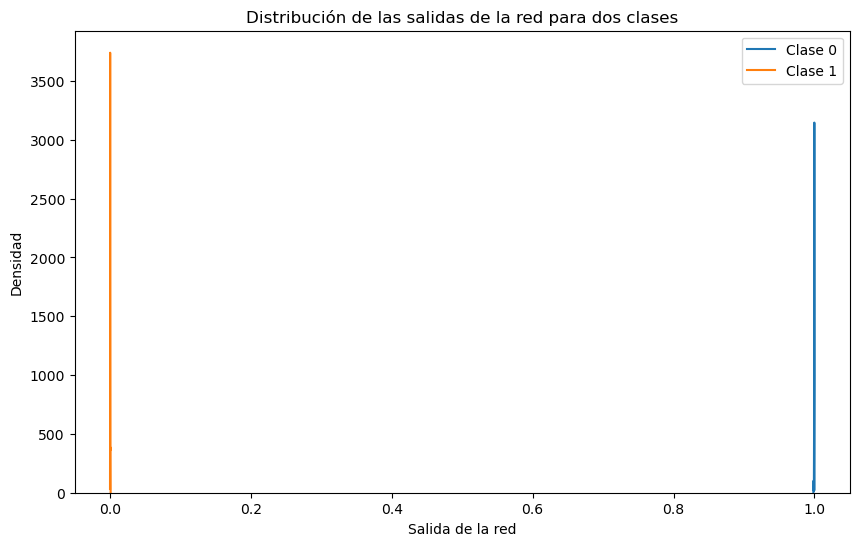

In [ ]:
# Convert tensors to numpy arrays if they are PyTorch tensors
if isinstance(outputs2, torch.Tensor):
    outputs_class_0 = outputs2.cpu().detach().numpy()
if isinstance(external_outputs2, torch.Tensor):
    outputs_class_1 = external_outputs2.cpu().detach().numpy()

# outputs_class_0 = np.random.rand(6400,1)
# outputs_class_1 = np.random.rand(6400,1)

# Flatten the arrays
outputs_class_0_flat = outputs_class_0.flatten()
outputs_class_1_flat = outputs_class_1.flatten()

# Plot the distributions
plt.figure(figsize=(10, 6))
sns.kdeplot(outputs_class_0_flat, label='Class 0')
sns.kdeplot(outputs_class_1_flat, label='Class 1')

plt.title('Distribution of Network Outputs for Two Classes')
plt.xlabel('Network Output')
plt.ylabel('Density')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

def evaluate_model2after(model, trainloader, externalloader, device):
    model.eval()  # Evaluation mode
    all_outputs = []
    all_labels = []

    # Determine which dataloader is smaller
    min_batches = min(len(trainloader), len(externalloader))
    
    # Get all predictions and labels from the training dataset (class 1)
    train_outputs = []
    train_labels = []
    with torch.no_grad():
        for i, data in enumerate(trainloader):
            if i >= min_batches:
                break
            inputs, _ = data
            labels = torch.ones(len(inputs)).unsqueeze(1)
            inputs, labels = inputs.to(device), labels.to(device)
            _, outputs = model(inputs)
            train_outputs.append(outputs)
            train_labels.append(labels)
    
    train_outputs = torch.cat(train_outputs)
    train_labels = torch.cat(train_labels)
    
    # Get all predictions and labels from the external dataset (class 0)
    external_outputs = []
    external_labels = []
    with torch.no_grad():
        for i, data in enumerate(externalloader):
            if i >= min_batches:
                break
            inputs, _ = data
            labels = torch.zeros(len(inputs)).unsqueeze(1)
            inputs, labels = inputs.to(device), labels.to(device)
            _, outputs = model(inputs)
            external_outputs.append(outputs)
            external_labels.append(labels)  # Class 1 for external dataset
    
    external_outputs = torch.cat(external_outputs)
    external_labels = torch.cat(external_labels)

    # Balance the number of examples by selecting the minimum number from each class
    min_len = min(len(train_outputs), len(external_outputs))
    
    # Randomly select min_len examples from each class
    indices_train = torch.randperm(len(train_outputs))[:min_len]
    indices_external = torch.randperm(len(external_outputs))[:min_len]

    correct_class_1 = (train_outputs > 0.5).sum().item()
    correct_class_0 = (external_outputs < 0.5).sum().item()
    
    balanced_outputs = torch.cat((train_outputs[indices_train], external_outputs[indices_external]))
    balanced_labels = torch.cat((train_labels[indices_train], external_labels[indices_external]))
    
    # Convert to binary labels (0 or 1)
    balanced_outputs = (balanced_outputs > 0.5).float()

    print('Mean of class 0 outputs (NOT used in train)', external_outputs.mean().item(), 'and mean of class 1 outputs', train_outputs.mean().item())

    print('This is the maximum of class 0:', external_outputs.max().item())
    print('This is the minimum of class 1:', train_outputs.min().item())
    minthres = train_outputs.min().item()
    
    # Calculate metrics
    accuracy = accuracy_score(balanced_labels.cpu(), balanced_outputs.cpu())
    print('Accuracy for class 0 (NOT used in training): ', correct_class_0 / len(train_outputs))
    print('Accuracy for class 1 (Used in training): ', correct_class_1 / len(external_outputs))
    print(f'Accuracy: {accuracy:.4f}')

    if isinstance(outputs2, torch.Tensor):
        outputs_class_0 = external_outputs.cpu().detach().numpy()
    if isinstance(external_outputs2, torch.Tensor):
        outputs_class_1 = train_outputs.cpu().detach().numpy()

    # outputs_class_0 = np.random.rand(6400,1)
    # outputs_class_1 = np.random.rand(6400,1)

    outputs_class_0_flat = outputs_class_0.flatten()
    outputs_class_1_flat = outputs_class_1.flatten()

    print('THESE ARE THE VALUES OF CLASS 0 ABOVE 0.64: ', np.sum(outputs_class_0_flat > minthres))
    print('THESE ARE THE VALUES OF CLASS 0 ABOVE 0.5: ', np.sum(outputs_class_0_flat > 0.5))
    
    # Plot the distributions
    plt.figure(figsize=(10, 6))
    sns.kdeplot(outputs_class_0_flat, label='Class 0')
    sns.kdeplot(outputs_class_1_flat, label='Class 1')

    plt.title('Distribution of network outputs for two classes')
    plt.xlabel('Network output')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    outputs_combined = np.concatenate((outputs_class_0_flat, outputs_class_1_flat))
    labels_combined = np.concatenate((np.zeros(len(outputs_class_0_flat)), np.ones(len(outputs_class_1_flat))))

    # Sort the combined outputs to try each value as a threshold
    sorted_indices = np.argsort(outputs_combined)
    sorted_outputs = outputs_combined[sorted_indices]
    sorted_labels = labels_combined[sorted_indices]

    # Initialize variables to find the best threshold
    best_threshold = None
    best_accuracy = 0

    # Iterate over all possible thresholds
    for i in range(1, len(sorted_outputs)):
        threshold = (sorted_outputs[i-1] + sorted_outputs[i]) / 2
        predictions = (outputs_combined >= threshold).astype(int)
        accuracy = np.mean(predictions == labels_combined)
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_threshold = threshold

    print(f"Best threshold: {best_threshold}")
    print(f"Best accuracy: {best_accuracy}")
    print(max(external_outputs).item())
    print(max(train_outputs).item())

    return accuracy


Media de las salidas de la clase 0 (NO usados en train) 0.3880734145641327 y medias de salidas de la clase 1 0.9999235272407532
Este es el máximo de la clase 0: 1.0
Este es el minimo de la clase 1: 0.9781663417816162
Accuracy clase 0 (NO Usados en entrenamiento):  0.6161818181818182
Accuracy clase 1 (Usados en entrenamiento):  0.9992732558139535
Accuracy: 0.8079
ESTOS SON LOS VALORES QUE HAY DE LA CLASE 0 POR ENCIMA DE 0.64:  2872
ESTOS SON LOS VALORES QUE HAY DE LA CLASE 0 POR ENCIMA DE 0.5:  4230


c:\Users\Equipo\anaconda3\envs\MembershipInferenceActive_20240\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Equipo\anaconda3\envs\MembershipInferenceActive_20240\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


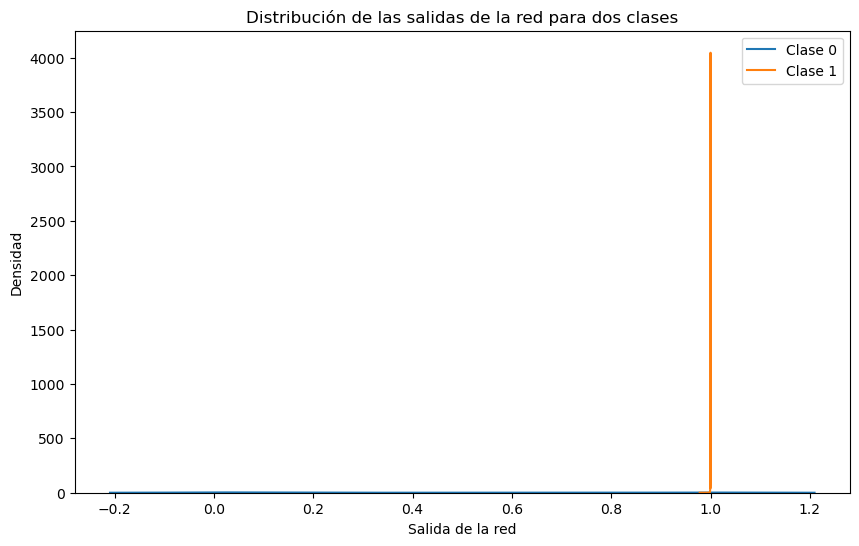

Mejor umbral: 0.9992762804031372
Mejor precisión: 0.9127589967284624
1.0
1.0


In [ ]:
val_accuracy2 = evaluate_model2after(model, trainloader, valloader, device)